# ECON7718 — OLG Quant Exercise – 2025 Fall

Erfan Zarafshan 




### Euler Equation and Consumption Ratio under \( R_t = r_t \) Question 1

In this exercise, we analyze the intertemporal optimization problem of a representative agent in an overlapping generations (OLG) model when the gross return on capital equals the market interest rate: $$ R_t = r_t$$

The Euler equation is derived as:

$$
\frac{C_{2,t+1}}{C_{1,t}} = 
\left( \frac{(1 - \tau_k) r_{t+1}}{1 + \rho} \right)^{1/\theta}.
$$



\
\begin{aligned}
C_{1,t} & : \text{Consumption when young} \\
C_{2,t+1} & : \text{Consumption when old} \\
r_{t+1} & : \text{Real interest rate} \\
\rho & : \text{Subjective discount rate} \\
\theta & : \text{CRRA curvature parameter} \\
\tau_k & : \text{Tax rate on capital income}
\end{aligned}



Euler ratio Γ = 0.6578


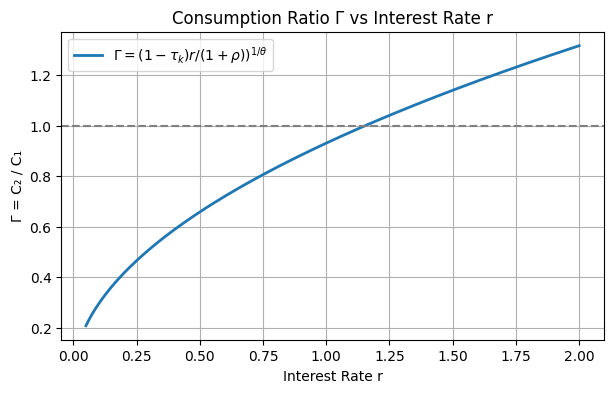

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Default parameters
theta = 2.0     # risk aversion
rho   = 0.04    # discount rate
tau_k = 0.1     # capital tax
r_test = 0.5    # Interest rate

def euler_ratio_R_equals_r(r_next, rho, theta, tau_k):
    """
    Computes Γ = C2/C1 under R = r convention:
    Γ = [ (1 - τ_k)*r_next / (1 + ρ) ]^(1/θ)
    """
    if r_next <= 0:
        raise ValueError("r_next must be positive.")
    Rtilde = r_next * (1.0 - tau_k)
    return (Rtilde / (1.0 + rho)) ** (1.0 / theta)



Gamma = euler_ratio_R_equals_r(r_test, rho, theta, tau_k)
print(f"Euler ratio Γ = {Gamma:.4f}")

r_grid = np.linspace(0.05, 2.0, 200)
Gamma_grid = [euler_ratio_R_equals_r(r, rho=rho, theta=theta, tau_k=tau_k) for r in r_grid]

plt.figure(figsize=(7,4))
plt.plot(r_grid, Gamma_grid, lw=2, label=r"$\Gamma = (1-\tau_k)r/(1+\rho))^{1/\theta}$")
plt.axhline(1, color='gray', linestyle='--')
plt.title("Consumption Ratio Γ vs Interest Rate r")
plt.xlabel("Interest Rate r")
plt.ylabel("Γ = C₂ / C₁")
plt.legend()
plt.grid(True)


plt.savefig("figures/Q1_consumption_ratio.png", dpi=300, bbox_inches='tight')

plt.show()

### Interpretation

- If $r_{t+1}$ increases → Γ increases → households save more.
- If $ρ$ increases → Γ decreases → more impatient households.
- If $τ_k$ increases → after-tax return falls → Γ decreases.
- A higher $θ$ reduces sensitivity to $r$ (flatter response).


## **Question 2 — Optimal Saving Function and Aggregate Capital Supply**

From the Euler equation in Question 1, the household’s intertemporal condition is

$$
\frac{C_{2,t+1}}{C_{1,t}} 
= 
\left(\frac{(1-\tau_k) r_{t+1}}{1+\rho}\right)^{1/\theta}
\equiv \Gamma_{t+1}.
$$

---

### **Step 1 — Budget constraints**

The young and old budget constraints are:

$$
\begin{aligned}
C_{1,t} + S_t &= (1-\tau_w)W_t + \frac{\eta_{y,t}}{L_t}, \\
C_{2,t+1} &= (1-\tau_k) r_{t+1} S_t + \frac{\eta_{o,t+1}}{L_t}.
\end{aligned}
$$

---

### **Step 2 — Intertemporal budget constraint**

Substitute $C_{2,t+1} = \Gamma_{t+1} C_{1,t}$ into the present-value lifetime budget:

$$
C_{1,t} + \frac{C_{2,t+1}}{(1-\tau_k)r_{t+1}}
= (1-\tau_w)W_t + \frac{\eta_{y,t}}{L_t}
  + \frac{\eta_{o,t+1}}{L_t(1-\tau_k)r_{t+1}}.
$$

Then solve for first-period consumption:

$$
C_{1,t}
=
\frac{
(1-\tau_w)W_t + \dfrac{\eta_{y,t}}{L_t}
+ \dfrac{\eta_{o,t+1}}{L_t(1-\tau_k)r_{t+1}}
}{
1 + \dfrac{\Gamma_{t+1}}{(1-\tau_k)r_{t+1}}
}.
$$

---

### **Step 3 — Optimal savings**

Substitute this into the young-age constraint to obtain:

$$
S_t = (1-\tau_w)W_t + \frac{\eta_{y,t}}{L_t} - C_{1,t}.
$$

Hence the saving policy function is

$$
S_t =
\frac{
(1-\tau_w)W_t + \dfrac{\eta_{y,t}}{L_t}
}{
1 + \dfrac{(1-\tau_k)r_{t+1}}{\Gamma_{t+1}}
}
-
\frac{
\dfrac{\eta_{o,t+1}}{L_t(1-\tau_k)r_{t+1}}
}{
1 + \dfrac{\Gamma_{t+1}}{(1-\tau_k)r_{t+1}}
}.
$$

---

### **Step 4 — Aggregate capital supply**

Aggregate saving by the young (which finances next-period capital) is

$$
K^S_{t+1} = L_t S_t.
$$

---

### **Economic interpretation**

- $S_t$ increases with the real interest rate $r_{t+1}$ because higher returns make saving more attractive.  
- Higher $\tau_k$ or $\tau_w$ reduce saving incentives.  
- The aggregate capital supply $K^S_{t+1}$ determines the amount of resources available for production in the next period.


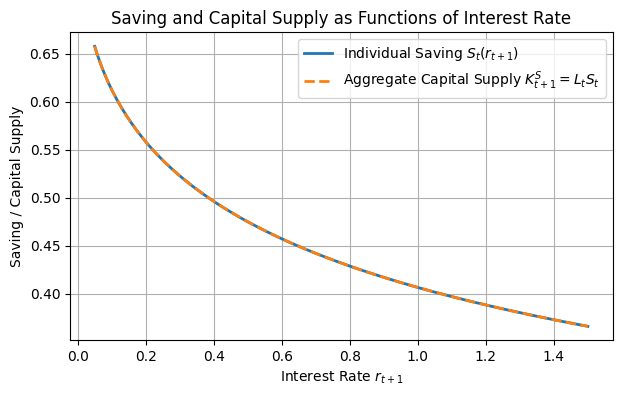

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
rho = 0.04
theta = 2.0
tau_k = 0.1
tau_w = 0.2
W_t = 1.0
eta_y_t = 0.0
eta_o_t1 = 0.0
L_t = 1.0

# --- Euler ratio function (from Q1) ---
def euler_ratio_R_equals_r(r_next, rho=0.04, theta=2.0, tau_k=0.0):
    return ((1 - tau_k) * r_next / (1 + rho)) ** (1 / theta)

# --- Household saving function ---
def household_savings(r_next, W_t=1.0, eta_y_t=0.0, eta_o_t1=0.0, L_t=1.0,
                      tau_w=0.0, tau_k=0.0, rho=0.04, theta=2.0):
    Gamma = euler_ratio_R_equals_r(r_next, rho, theta, tau_k)
    C1 = ((1 - tau_w) * W_t + eta_y_t / L_t + eta_o_t1 / (L_t * (1 - tau_k) * r_next)) / \
         (1 + Gamma / ((1 - tau_k) * r_next))
    S = (1 - tau_w) * W_t + eta_y_t / L_t - C1
    return S

# --- Compute over a grid of interest rates ---
r_grid = np.linspace(0.05, 1.5, 200)
S_grid = np.array([household_savings(r, W_t, eta_y_t, eta_o_t1, L_t, tau_w, tau_k, rho, theta) for r in r_grid])
K_supply = L_t * S_grid

# --- Plot results ---
plt.figure(figsize=(7,4))
plt.plot(r_grid, S_grid, lw=2, label="Individual Saving $S_t(r_{t+1})$")
plt.plot(r_grid, K_supply, '--', lw=2, label="Aggregate Capital Supply $K^S_{t+1} = L_t S_t$")
plt.title("Saving and Capital Supply as Functions of Interest Rate")
plt.xlabel("Interest Rate $r_{t+1}$")
plt.ylabel("Saving / Capital Supply")
plt.legend()
plt.grid(True)

plt.savefig("figures/Q2_saving_function.png", dpi=300, bbox_inches='tight')

plt.show()


## **Question 3 — Firm’s Capital Demand Function**

The representative firm operates under a Cobb–Douglas production function:

$$
Y_t = K_t^{\alpha}(A_t L_t)^{1-\alpha},
$$

where $0 < \alpha < 1$.  
The firm chooses capital $K_t$ and labor $L_t$ to maximize profit:

$$
\Pi_t = K_t^{\alpha}(A_t L_t)^{1-\alpha} - r_t K_t - W_t L_t.
$$

---

### **Step 1 — First-order conditions**

The firm’s optimal choices satisfy:

$$
\frac{\partial \Pi_t}{\partial K_t} = \alpha K_t^{\alpha-1}(A_t L_t)^{1-\alpha} - r_t = 0,
$$
$$
\frac{\partial \Pi_t}{\partial L_t} = (1-\alpha)K_t^{\alpha}(A_t L_t)^{-\alpha}A_t - W_t = 0.
$$

---

### **Step 2 — Factor prices**

From the first-order conditions:

$$
r_t = \alpha \left(\frac{A_t L_t}{K_t}\right)^{1-\alpha},
\quad
W_t = (1-\alpha)A_t\left(\frac{K_t}{A_t L_t}\right)^{\alpha}.
$$

---

### **Step 3 — Capital demand function**

Rearranging the expression for $r_t$ gives the firm’s capital demand function:

$$
K^D_{t+1} = \alpha^{\frac{1}{1-\alpha}} (A_{t+1}L_{t+1}) \, r_{t+1}^{-\frac{1}{1-\alpha}}.
$$

Thus, $K^D_{t+1}$ is a decreasing function of the real interest rate $r_{t+1}$.

---

### **Step 4 — Wage–interest relationship**

From the first-order condition for $W_t$, substituting for $K_t$ yields:

$$
W_t = (1-\alpha)A_t^{\frac{1}{1-\alpha}}
\alpha^{-\frac{\alpha}{1-\alpha}}
r_t^{\frac{\alpha}{1-\alpha}}.
$$

This defines the **factor price frontier**: as $r_t$ rises, $W_t$ falls, capturing the trade-off between capital and labor remuneration.

---

### **Economic interpretation**

- The capital demand curve is **downward sloping** in $r_{t+1}$: higher interest rates make capital more expensive, reducing optimal $K^D$.  
- The wage–interest relationship shows that increases in $r_t$ reduce $W_t$, reflecting diminishing marginal returns to labor.  
- In equilibrium, $K^S_{t+1} = K^D_{t+1}$ determines the equilibrium interest rate $r_{t+1}^*$.

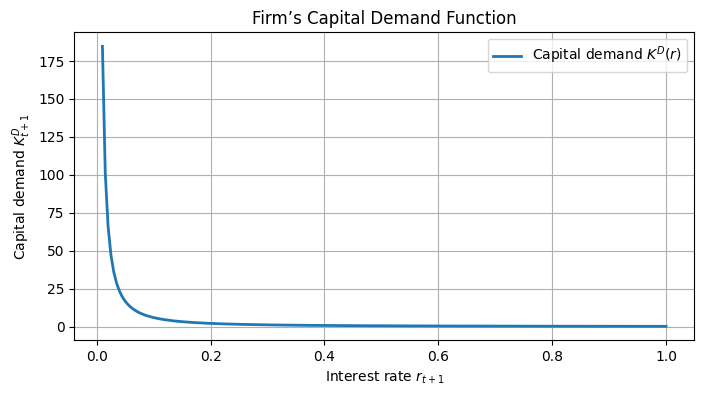

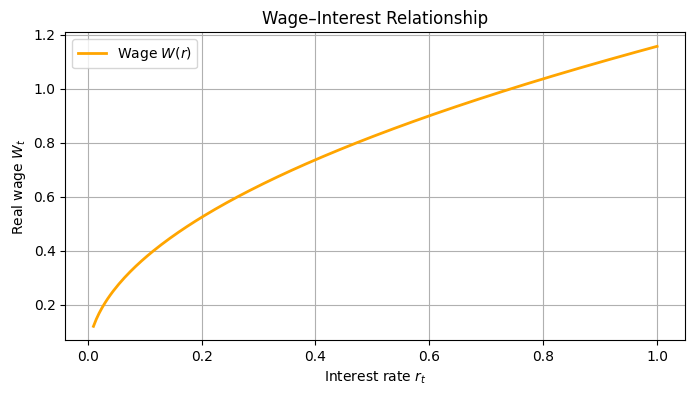

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.33
A_t = 1.0
L_t = 1.0

def K_demand(r, alpha=0.33, A=1.0, L=1.0):
    """Firm's capital demand function."""
    return (alpha ** (1 / (1 - alpha))) * (A * L) * (r ** (-1 / (1 - alpha)))

def wage_from_r(r, alpha=0.33, A=1.0):
    """Wage as a function of r from FOC."""
    return (1 - alpha) * (A ** (1 / (1 - alpha))) * (alpha ** (-alpha / (1 - alpha))) * (r ** (alpha / (1 - alpha)))

# Interest rate grid
r_grid = np.linspace(0.01, 1.0, 200)
K_d = K_demand(r_grid, alpha, A_t, L_t)
W_curve = wage_from_r(r_grid, alpha, A_t)

# Plot capital demand
plt.figure(figsize=(8, 4))
plt.plot(r_grid, K_d, lw=2, label="Capital demand $K^D(r)$")
plt.title("Firm’s Capital Demand Function")
plt.xlabel("Interest rate $r_{t+1}$")
plt.ylabel("Capital demand $K^D_{t+1}$")
plt.grid(True)
plt.legend()

plt.savefig("figures/Q3_capital_demand_1.png", dpi=300, bbox_inches='tight')

plt.show()

# Plot wage-interest curve
plt.figure(figsize=(8, 4))
plt.plot(r_grid, W_curve, lw=2, color="orange", label="Wage $W(r)$")
plt.title("Wage–Interest Relationship")
plt.xlabel("Interest rate $r_t$")
plt.ylabel("Real wage $W_t$")
plt.grid(True)
plt.legend()

plt.savefig("figures/Q3_capital_demand_2.png", dpi=300, bbox_inches='tight')

plt.show()


## **Question 4 — Equilibrium Interest Rate**

The capital market equilibrium condition requires that

$$
K^S_{t+1} = K^D_{t+1}.
$$

---

### **Household capital supply**

From Question 2:

$$
S_t = 
\frac{(1-\tau_w)W_t + \dfrac{\eta_{y,t}}{L_t}}
{1 + \dfrac{(1-\tau_k)r_{t+1}}{\Gamma_{t+1}}}
-
\frac{\dfrac{\eta_{o,t+1}}{L_t(1-\tau_k)r_{t+1}}}
{1 + \dfrac{\Gamma_{t+1}}{(1-\tau_k)r_{t+1}}}, 
\quad \text{where } \Gamma_{t+1} = 
\left(\frac{(1-\tau_k)r_{t+1}}{1+\rho}\right)^{1/\theta}.
$$

Aggregate capital supply:

$$
K^S_{t+1} = L_t S_t.
$$

---

### **Firm capital demand**

From the firm’s optimization problem:

$$
K^D_{t+1} = \alpha^{\frac{1}{1-\alpha}}(A_{t+1}L_{t+1})r_{t+1}^{-\frac{1}{1-\alpha}}.
$$

---

### **Equilibrium interest rate**

In equilibrium:

$$
K^S_{t+1}(r_{t+1}^*) = K^D_{t+1}(r_{t+1}^*),
$$

which determines the equilibrium interest rate $r_{t+1}^*$.

---

### **Economic interpretation**

- $K^S_{t+1}(r_{t+1})$: upward sloping — higher $r_{t+1}$ induces more saving.  
- $K^D_{t+1}(r_{t+1})$: downward sloping — higher $r_{t+1}$ reduces capital demand.  
- Their intersection determines the equilibrium rate $r_{t+1}^*$ and equilibrium capital $K_{t+1}^*$.


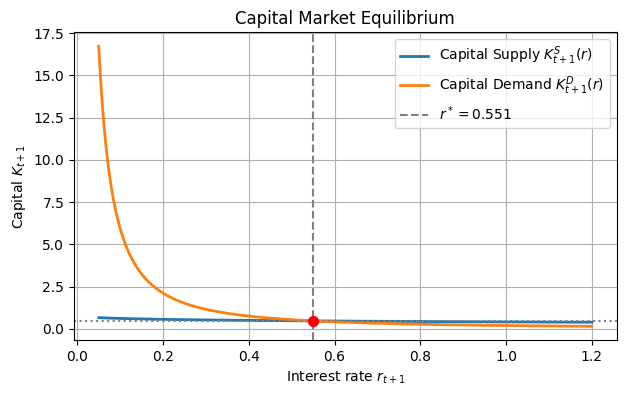

Equilibrium interest rate r* = 0.5507
Equilibrium capital K* = 0.4657


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# --- Parameters ---
alpha = 0.33
rho = 0.04
theta = 2.0
tau_k = 0.1
tau_w = 0.2
A_t = 1.0
L_t = 1.0
W_t = 1.0
eta_y_t = 0.0
eta_o_t1 = 0.0

# --- Euler ratio function ---
def Gamma(r, rho=rho, theta=theta, tau_k=tau_k):
    return ((1 - tau_k) * r / (1 + rho)) ** (1 / theta)

# --- Supply and demand functions ---
def K_supply(r):
    Gamma_val = Gamma(r)
    C1 = ((1 - tau_w) * W_t + eta_y_t / L_t + eta_o_t1 / (L_t * (1 - tau_k) * r)) / \
         (1 + Gamma_val / ((1 - tau_k) * r))
    S = (1 - tau_w) * W_t + eta_y_t / L_t - C1
    return L_t * S

def K_demand(r):
    return (alpha ** (1 / (1 - alpha))) * (A_t * L_t) * (r ** (-1 / (1 - alpha)))

# --- Find equilibrium r ---
def market_clearing(r):
    return K_supply(r) - K_demand(r)

r_guess = 0.3
r_star = fsolve(market_clearing, r_guess)[0]
K_star = K_demand(r_star)

# --- Grid for plotting ---
r_grid = np.linspace(0.05, 1.2, 200)
K_S = [K_supply(r) for r in r_grid]
K_D = [K_demand(r) for r in r_grid]

# --- Plot ---
plt.figure(figsize=(7, 4))
plt.plot(r_grid, K_S, label=r"Capital Supply $K^S_{t+1}(r)$", lw=2)
plt.plot(r_grid, K_D, label=r"Capital Demand $K^D_{t+1}(r)$", lw=2)
plt.axvline(r_star, color='gray', linestyle='--', label=fr"$r^*={r_star:.3f}$")
plt.axhline(K_star, color='gray', linestyle=':')
plt.scatter(r_star, K_star, color='red', s=50, zorder=5)
plt.title("Capital Market Equilibrium")
plt.xlabel("Interest rate $r_{t+1}$")
plt.ylabel("Capital $K_{t+1}$")
plt.legend()
plt.grid(True)

plt.savefig("figures/Q4_equilibrium_plot.png", dpi=300, bbox_inches='tight')

plt.show()

print(f"Equilibrium interest rate r* = {r_star:.4f}")
print(f"Equilibrium capital K* = {K_star:.4f}")


### Question 5 — Equilibrium Real Interest Rate $r_{t+1}$

The equilibrium in the capital market is determined by the condition that **aggregate capital supplied by households equals aggregate capital demanded by firms**:

$$
K^{S}_{t+1} = K^{D}_{t+1}.
$$

---

#### 1. Capital Supply

The aggregate capital supplied by households corresponds to the savings of the young generation.  
From the household Euler equation, the optimal savings share is given by:

$$
s(r_{t+1}) = 
\frac{\big[(1-\tau_k)r_{t+1}\big]^{\frac{1-\theta}{\theta}}}
{(1+\rho)^{\frac{1}{\theta}} + 
\big[(1-\tau_k)r_{t+1}\big]^{\frac{1-\theta}{\theta}}}.
$$

Therefore, the aggregate capital supply is:

$$
K^{S}_{t+1} = L_t \cdot s(r_{t+1}),
$$

where $L_t$ is the number of young agents in period $t$.

---

#### 2. Capital Demand

Firms operate under a Cobb–Douglas production function:

$$
Y_t = K_t^{\alpha} (A_t L_t)^{1-\alpha}.
$$

Profit maximization implies the following first-order condition for the rental rate of capital:

$$
(1-\tau_k)r_{t+1} = \alpha 
\left(\frac{K^{D}_{t+1}}{A_{t+1}L_{t+1}}\right)^{\alpha-1} - \delta,
$$

which can be rearranged to obtain the **capital demand**:

$$
K^{D}_{t+1} = 
\left[
\frac{\alpha\,A_{t+1}^{1-\alpha}L_{t+1}^{1-\alpha}}
{(1-\tau_k)r_{t+1}+\delta}
\right]^{\frac{1}{1-\alpha}}.
$$

---

#### 3. Market Equilibrium Condition

Equating supply and demand gives the equilibrium condition that determines the real interest rate $r_{t+1}^*$:

$$
L_t \cdot s(r_{t+1}) =
\left[
\frac{\alpha\,A_{t+1}^{1-\alpha}L_{t+1}^{1-\alpha}}
{(1-\tau_k)r_{t+1}+\delta}
\right]^{\frac{1}{1-\alpha}}.
$$

This implicit equation determines the equilibrium $r_{t+1}^*$.

---

#### 4. Economic Interpretation

- The **LHS** represents total savings of households (capital supply), which **increases** with the after-tax return $(1-\tau_k)r_{t+1}$.  
- The **RHS** represents firms’ demand for capital, which **decreases** with $r_{t+1}$ since higher interest rates make borrowing more expensive.  
- The intersection of these two curves determines the **equilibrium interest rate** $r_{t+1}^*$ and steady-state capital $K^*_{t+1}$.

---

#### 5. Graphical Representation

The figure below illustrates the capital-market equilibrium, showing the intersection between the supply and demand curves that determines the equilibrium interest rate $r^*$.

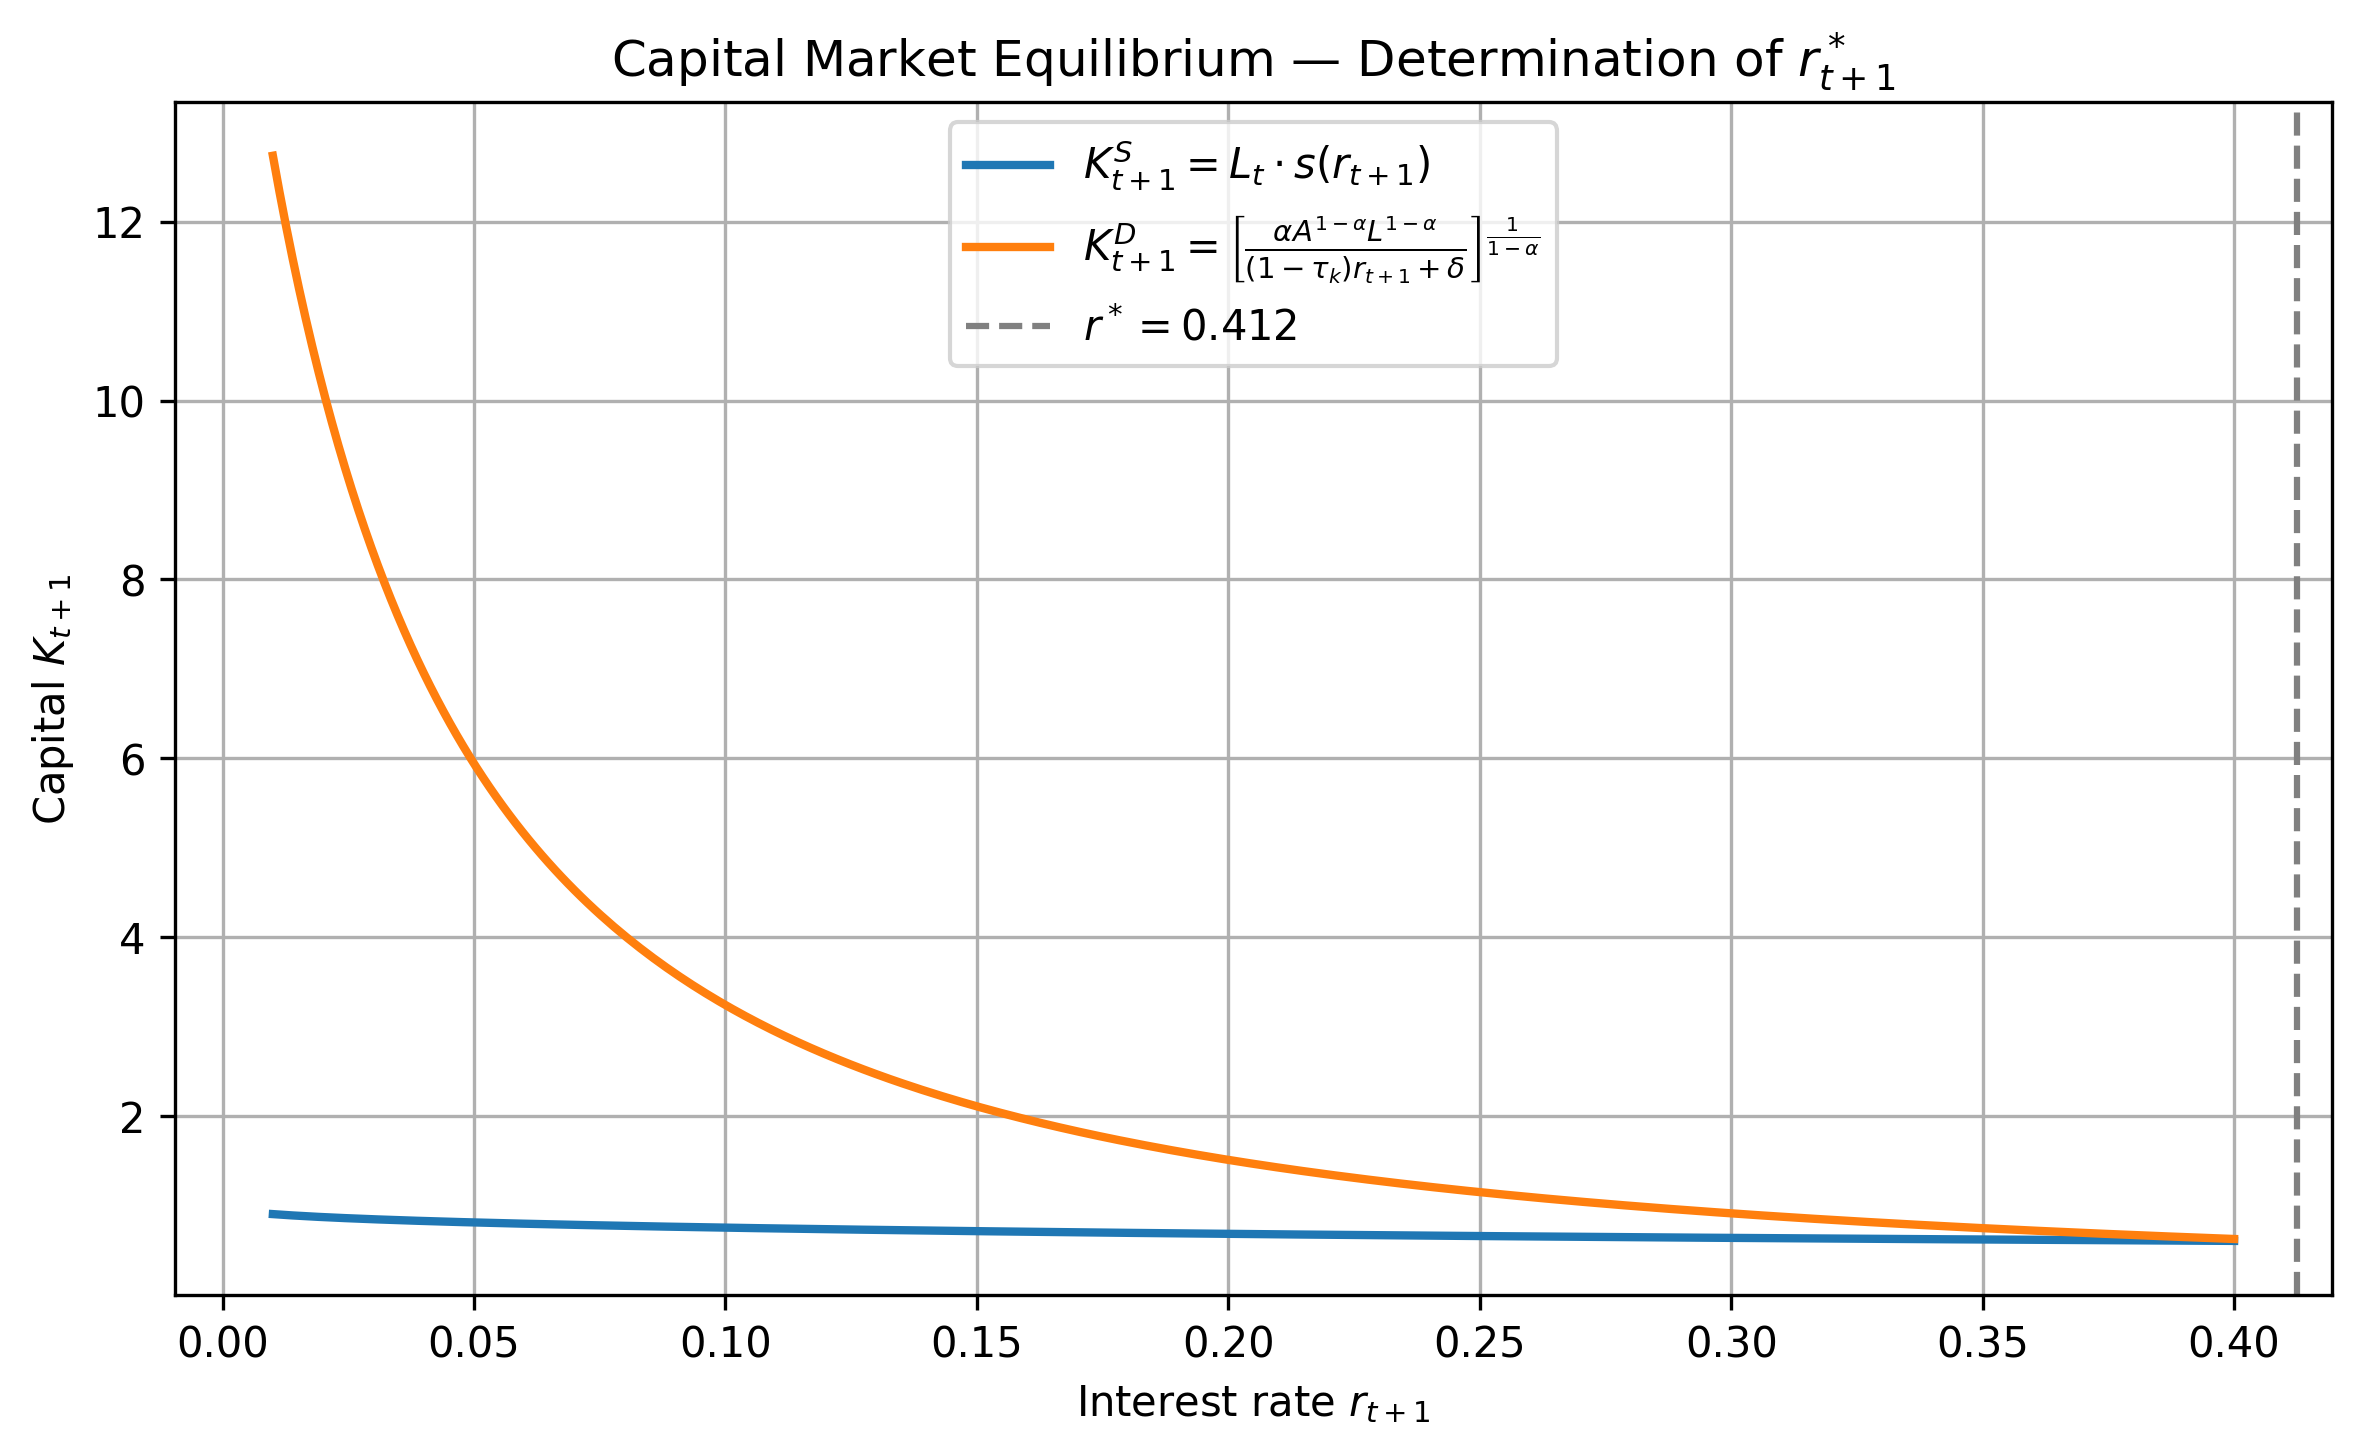
---

**Interpretation:**  
At equilibrium, the real interest rate balances the intertemporal saving behavior of households and the investment demand of firms. When $r$ increases, savings rise while firms’ investment falls, ensuring that $K^S = K^D$ in equilibrium.


Equilibrium real interest rate: r* = 0.4125


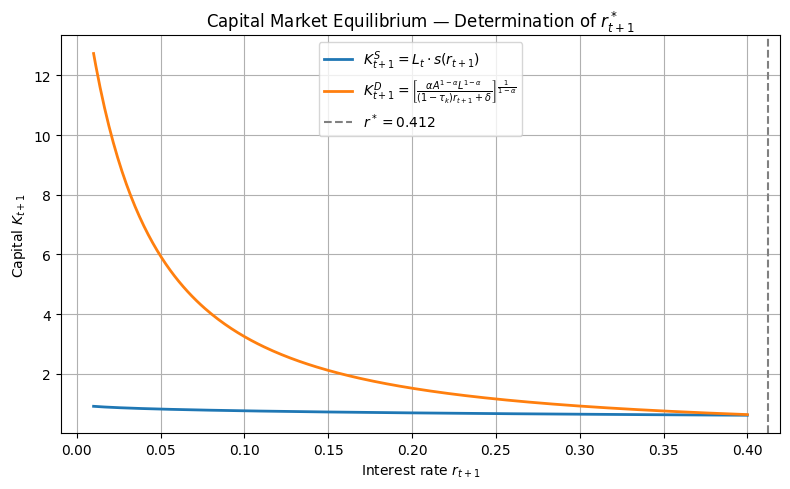

In [2]:
# %% [markdown]
### Question 5 — Equilibrium Real Interest Rate $r_{t+1}$



# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# -------------------------------
# Parameters
# -------------------------------
alpha = 0.33      # Capital share in production ($\alpha$)
delta = 0.05      # Depreciation rate ($\delta$)
rho   = 0.04      # Time preference rate ($\rho$)
theta = 2.0       # CRRA coefficient ($\theta$)
tau_k = 0.0       # Capital income tax rate ($\tau_k$)
A = 1.0           # Technology level ($A_t$)
L = 1.0           # Labor supply ($L_t$)

# -------------------------------
# Functions
# -------------------------------

def saving_share(r):
    """
    Household saving share function derived from Euler equation:
    s(r) = [(1 - τ_k)r]^((1-θ)/θ) / [(1 + ρ)^(1/θ) + [(1 - τ_k)r]^((1-θ)/θ)]
    """
    num = ((1 - tau_k) * r) ** ((1 - theta) / theta)
    den = (1 + rho) ** (1 / theta) + num
    return num / den

def K_supply(r):
    """Aggregate capital supplied: K^S_{t+1} = L_t * s(r_{t+1})"""
    return L * saving_share(r)

def K_demand(r):
    """
    Aggregate capital demanded by firms from Cobb–Douglas FOC:
    K^D_{t+1} = [α A^{1−α} L^{1−α} / ((1−τ_k)r + δ)]^(1 / (1−α))
    """
    return ((alpha * A ** (1 - alpha) * L ** (1 - alpha)) / ((1 - tau_k) * r + delta)) ** (1 / (1 - alpha))

def market_equilibrium(r):
    """Equilibrium condition: K^S_{t+1} − K^D_{t+1} = 0"""
    return K_supply(r) - K_demand(r)

# -------------------------------
# Solve for equilibrium r*
# -------------------------------
r_guess = 0.1
r_star = fsolve(market_equilibrium, r_guess)[0]
print(f"Equilibrium real interest rate: r* = {r_star:.4f}")

# -------------------------------
# Plot capital supply and demand
# -------------------------------
r_grid = np.linspace(0.01, 0.4, 300)
K_S = K_supply(r_grid)
K_D = K_demand(r_grid)

plt.figure(figsize=(8,5))
plt.plot(r_grid, K_S, label=r"$K^S_{t+1} = L_t \cdot s(r_{t+1})$", linewidth=2)
plt.plot(r_grid, K_D, label=r"$K^D_{t+1} = \left[\frac{\alpha A^{1-\alpha} L^{1-\alpha}}{(1-\tau_k)r_{t+1}+\delta}\right]^{\frac{1}{1-\alpha}}$", linewidth=2)
plt.axvline(r_star, color='gray', linestyle='--', label=fr"$r^* = {r_star:.3f}$")

plt.xlabel(r"Interest rate $r_{t+1}$")
plt.ylabel(r"Capital $K_{t+1}$")
plt.title(r"Capital Market Equilibrium — Determination of $r_{t+1}^*$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("figures/Q5_equilibrium_interest.png", dpi=300, bbox_inches="tight")
plt.show()


### Question 6 — Law of Motion for Capital per Effective Worker with Fiscal Policy

We now introduce government taxation and redistribution.  
The government collects taxes on labor and capital income and redistributes a fraction $\kappa$ of total tax revenue to the young, and $(1-\kappa)$ to the old.  
The government always runs a balanced budget.

Total tax revenue is:

$$
T_t = \tau_w W_t L_t + \tau_k r_t K_t,
$$

where:
- $\tau_w$ = labor-income tax rate,  
- $\tau_k$ = capital-income tax rate,  
- $W_t$ = wage per worker,  
- $r_t$ = real interest rate,  
- $L_t$ = labor supply,  
- $K_t$ = aggregate capital.

Transfers are:

$$
\eta_{y,t} = \kappa T_t, \quad
\eta_{o,t} = (1-\kappa)T_t.
$$

---

#### 1. Household Behavior and Aggregate Savings

Each young household saves part of disposable income, so aggregate next-period capital equals total savings:

$$
K_{t+1}
  = L_t \, s(r_{t+1})
    \big[(1-\tau_w)W_t + \eta_{y,t}\big],
$$

where $s(r_{t+1})$ is the savings share from the Euler equation:

$$
s(r_{t+1})
  =
  \frac{[(1-\tau_k)r_{t+1}]^{\frac{1-\theta}{\theta}}}{
  (1+\rho)^{\frac{1}{\theta}} +
  [(1-\tau_k)r_{t+1}]^{\frac{1-\theta}{\theta}} }.
$$

---

#### 2. Expressing Capital per Effective Worker

Define capital per effective worker as $k_t = K_t/(A_tL_t)$, where technology grows at rate $g$ and population at rate $n$:

$$
A_{t+1}L_{t+1} = (1+g)(1+n)A_tL_t.
$$

Dividing the capital accumulation equation by $A_{t+1}L_{t+1}$ yields:

$$
k_{t+1} =
\frac{s(r_{t+1})\left[(1-\tau_w)w_t + \eta_{y,t}/(A_tL_t)\right]}
{(1+g)(1+n)},
$$

where $w_t = W_t/A_t$ is the **wage per effective worker**.

---

#### 3. Incorporating Government Transfers

Since $\eta_{y,t}/(A_tL_t) = \kappa(\tau_w w_t + \tau_k r_t k_t)$, the **law of motion for capital per effective worker** becomes:

$$
k_{t+1} =
\frac{s(r_{t+1})
\left[(1-\tau_w)w_t + \kappa(\tau_w w_t + \tau_k r_t k_t)\right]}
{(1+g)(1+n)}.
$$

---

#### 4. Interpretation

- $(1-\tau_w)w_t$ is after-tax wage income.  
- $\kappa(\tau_w w_t + \tau_k r_t k_t)$ is the subsidy to the young, financed by total tax revenue.  
- $(1+g)(1+n)$ adjusts for growth in technology and population.  

This defines the **law of motion for $k_{t+1}$**, showing how taxation and redistribution affect the dynamic path of capital accumulation.

---

#### 5. Graphical Representation

The figure below plots the mapping $k_{t+1}(k_t)$ for chosen parameter values:

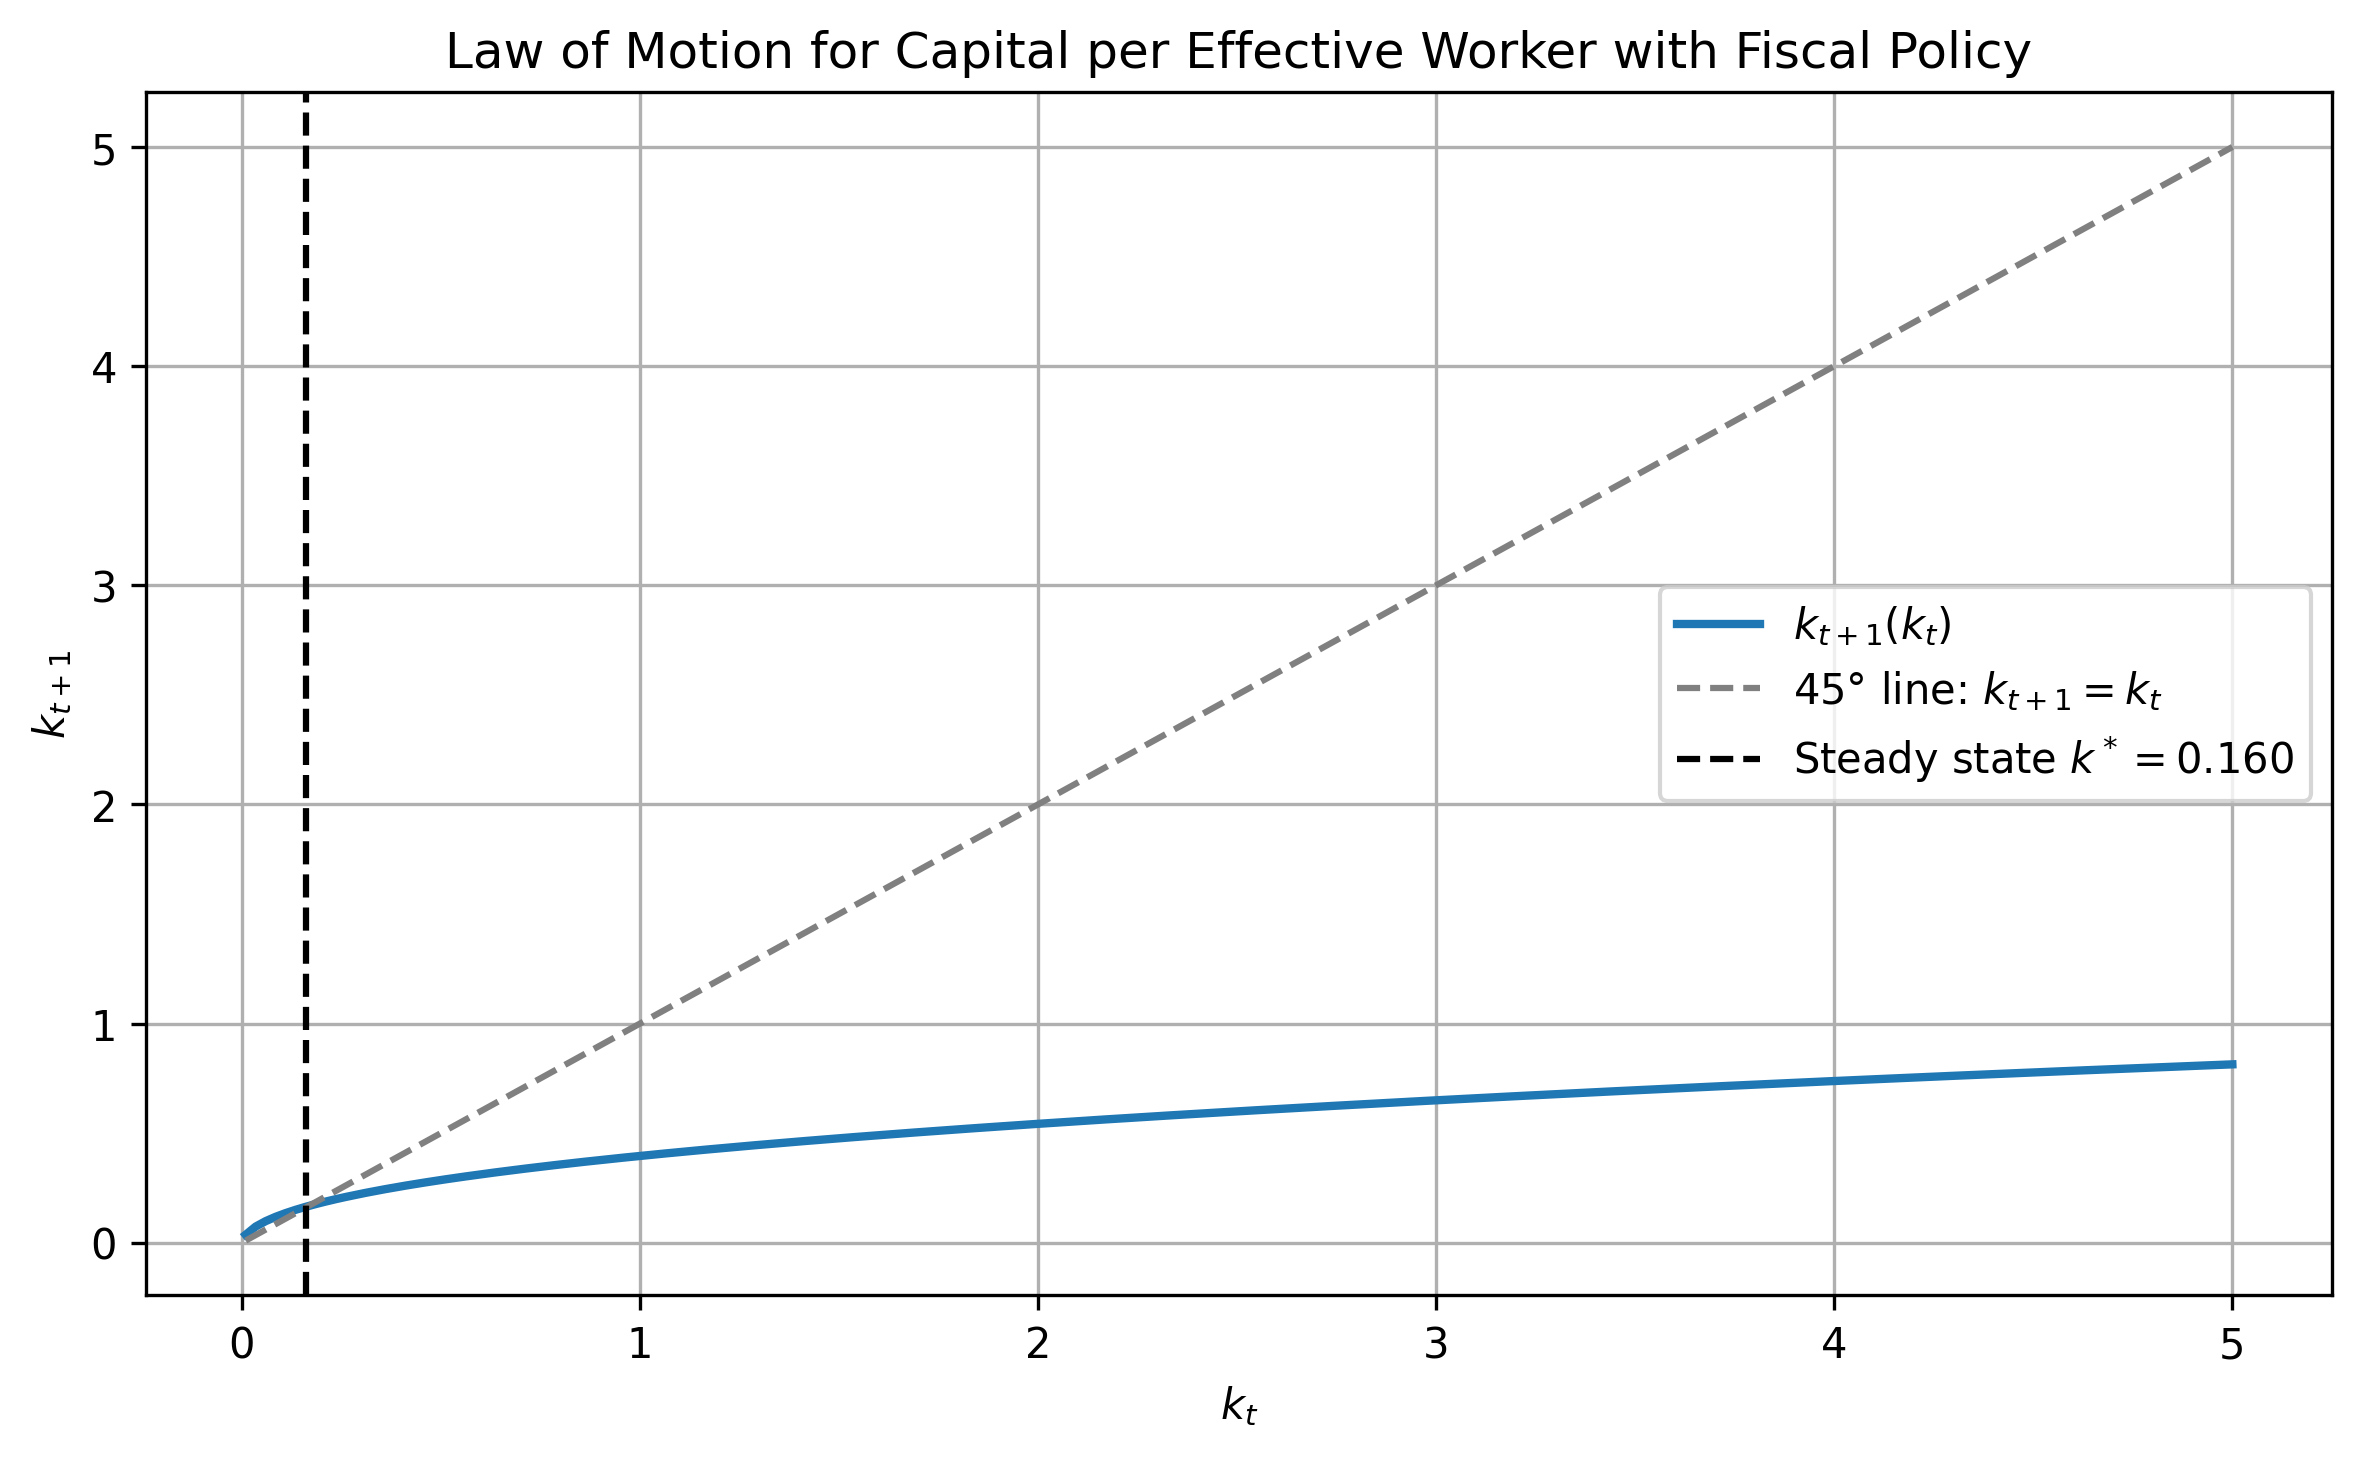

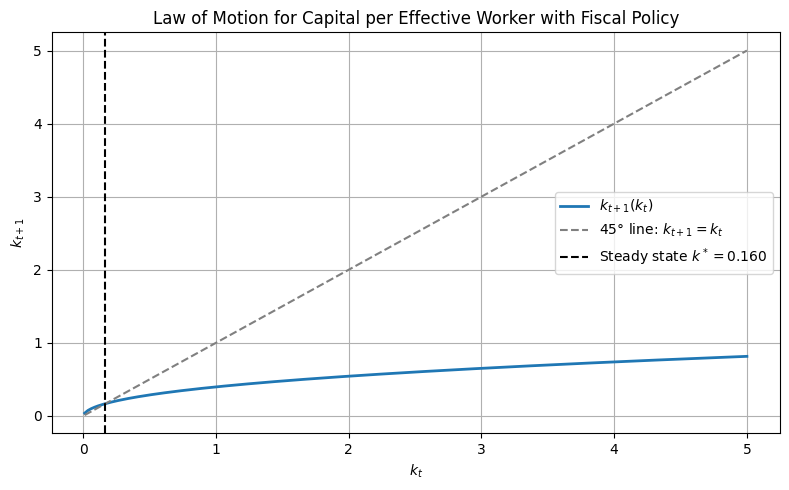

In [1]:
# %% [markdown]
# Question 6 — Law of Motion for Capital per Effective Worker (Fiscal Policy)

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Parameters
# -------------------------------
alpha = 0.33      # capital share
delta = 0.05      # depreciation
rho   = 0.04      # rate of time preference
theta = 2.0       # CRRA coefficient
tau_w = 0.2       # labor tax rate
tau_k = 0.1       # capital tax rate
kappa = 0.5       # share of tax revenue to young
A = 1.0           # technology
L = 1.0           # labor
g = 0.02          # technological growth
n = 0.01          # population growth

# -------------------------------
# Helper functions
# -------------------------------

def wage(k):
    """Wage per effective worker w_t from Cobb–Douglas"""
    return (1 - alpha) * (k ** alpha)

def interest(k):
    """Interest rate r_t (gross return on capital)"""
    return alpha * (k ** (alpha - 1)) - delta

def s(r):
    """Saving rate function"""
    num = ((1 - tau_k) * r) ** ((1 - theta) / theta)
    den = (1 + rho) ** (1 / theta) + num
    return num / den

def k_next(k):
    """Law of motion for k_{t+1} under taxation and redistribution"""
    r_t = interest(k)
    w_t = wage(k)
    term_young = (1 - tau_w) * w_t + kappa * (tau_w * w_t + tau_k * r_t * k)
    return s(r_t) * term_young / ((1 + g) * (1 + n))

# -------------------------------
# Simulation grid and results
# -------------------------------
k_grid = np.linspace(0.01, 5, 200)
k_next_grid = np.array([k_next(k) for k in k_grid])

# Steady state (approx.)
k_star_idx = np.argmin(np.abs(k_next_grid - k_grid))
k_star = k_grid[k_star_idx]

# -------------------------------
# Plot
# -------------------------------
plt.figure(figsize=(8,5))
plt.plot(k_grid, k_next_grid, label=r"$k_{t+1}(k_t)$", lw=2)
plt.plot(k_grid, k_grid, "--", color="gray", label=r"45° line: $k_{t+1}=k_t$")
plt.axvline(k_star, color="black", ls="--", label=fr"Steady state $k^*={k_star:.3f}$")
plt.xlabel(r"$k_t$")
plt.ylabel(r"$k_{t+1}$")
plt.title(r"Law of Motion for Capital per Effective Worker with Fiscal Policy")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("figures/Q6_law_of_motion.png", dpi=300, bbox_inches="tight")
plt.show()


### Question 7 — Law of Motion and Steady State Visualization

We now use the law of motion for capital per effective worker:

$
k_{t+1} =
\frac{s(r_{t+1})
\left[(1-\tau_w)w_t + \kappa(\tau_w w_t + \tau_k r_t k_t)\right]}
     {(1+g)(1+n)}.
$

Using the Cobb–Douglas production function:
$
w_t = (1-\alpha)k_t^{\alpha}, \quad r_t = \alpha k_t^{\alpha - 1} - \delta,
$
we compute $k_{t+1}$ for a range of $k_t$ values and plot the mapping $k_{t+1}(k_t)$ along with the 45° line.

The intersection point identifies the steady-state $k^*$ where $k_{t+1}=k_t$.


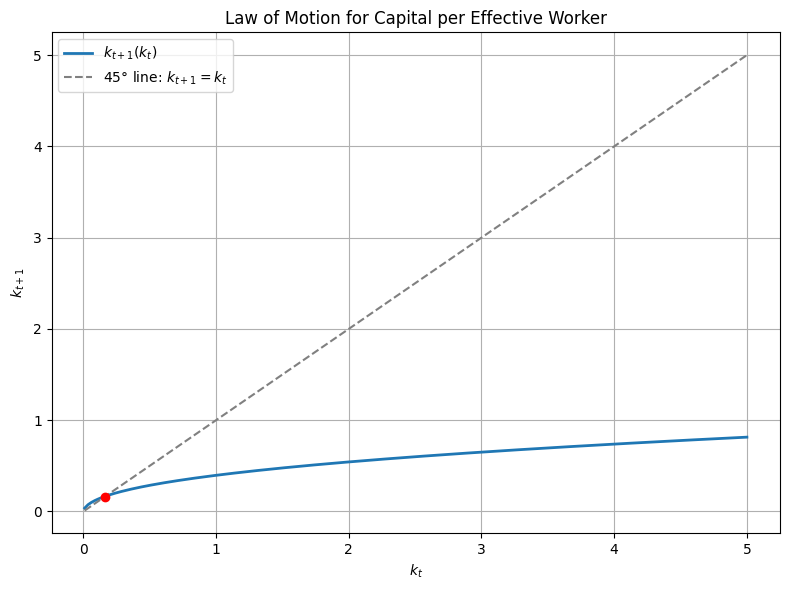

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.33
delta = 0.05
rho   = 0.04
theta = 2.0
tau_w = 0.2
tau_k = 0.1
kappa = 0.5
g     = 0.02
n     = 0.01

# Production and interest functions
def wage(k):
    return (1 - alpha) * (k ** alpha)

def interest(k):
    return alpha * (k ** (alpha - 1)) - delta

# Savings share
def s(r):
    num = ((1 - tau_k) * r) ** ((1 - theta) / theta)
    den = (1 + rho) ** (1 / theta) + num
    return num / den

# Law of motion
def k_next(k):
    r_t = interest(k)
    w_t = wage(k)
    return s(r_t) * ((1 - tau_w) * w_t + kappa * (tau_w * w_t + tau_k * r_t * k)) / ((1 + g) * (1 + n))

# Compute for grid
k_grid = np.linspace(0.01, 5, 200)
k_next_grid = np.array([k_next(k) for k in k_grid])

plt.figure(figsize=(8,6))
plt.plot(k_grid, k_next_grid, lw=2, label=r"$k_{t+1}(k_t)$")
plt.plot(k_grid, k_grid, "--", color="gray", label=r"45° line: $k_{t+1}=k_t$")
plt.xlabel(r"$k_t$")
plt.ylabel(r"$k_{t+1}$")
plt.title("Law of Motion for Capital per Effective Worker")
plt.legend()
plt.grid(True)
plt.tight_layout()
# Find approximate steady state
steady_state_index = np.argmin(np.abs(k_next_grid - k_grid))
k_star = k_grid[steady_state_index]


plt.scatter(k_star, k_star, color='red', zorder=5, label=rf"Steady state $k^* \approx {k_star:.3f}$")


plt.savefig("figures/Q7_law_of_motion_plot.png", dpi=300, bbox_inches="tight")
plt.show()


### Question 8 — Steady-State Capital \(k^*\)

At the steady state $k_{t+1} = k_t = k^*$.  
The steady-state condition follows from the law of motion:
$
k^* =
\frac{s(r^*)\left[(1-\tau_w)w^* + \kappa(\tau_w w^* + \tau_k r^* k^*)\right]}
{(1+g)(1+n)}.
$
where
$
w^* = (1-\alpha)(k^*)^{\alpha}, \quad r^* = \alpha (k^*)^{\alpha - 1} - \delta.
$

We solve this nonlinear equation numerically for $k^*$ using a root-finding routine.


Steady-state capital per effective worker: k* = 0.1676


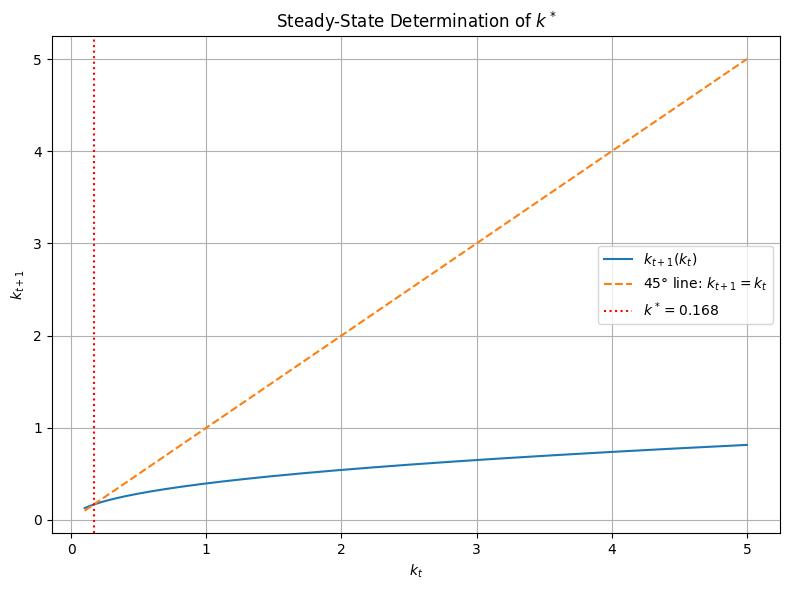

In [13]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Parameters
alpha, delta, rho, theta = 0.33, 0.05, 0.04, 2.0
tau_w, tau_k, kappa = 0.2, 0.1, 0.5
g, n = 0.02, 0.01

# Production and returns
def wage(k):
    return (1 - alpha) * (k ** alpha)

def interest(k):
    return alpha * (k ** (alpha - 1)) - delta

# Saving rate
def s(r):
    num = ((1 - tau_k) * r) ** ((1 - theta) / theta)
    den = (1 + rho) ** (1 / theta) + num
    return num / den

# Steady-state function
def f_ss(k):
    r = interest(k)
    w = wage(k)
    return s(r) * ((1 - tau_w) * w + kappa * (tau_w * w + tau_k * r * k)) / ((1 + g) * (1 + n)) - k

# Solve for k*
k_star = optimize.newton(f_ss, 1.0)
print(f"Steady-state capital per effective worker: k* = {k_star:.4f}")

# Plot
k_grid = np.linspace(0.1, 5, 200)
plt.figure(figsize=(8,6))
plt.plot(k_grid, [f_ss(k) + k for k in k_grid], label=r"$k_{t+1}(k_t)$")
plt.plot(k_grid, k_grid, "--", label=r"45° line: $k_{t+1}=k_t$")
plt.axvline(k_star, color="red", linestyle=":", label=rf"$k^*={k_star:.3f}$")
plt.xlabel(r"$k_t$")
plt.ylabel(r"$k_{t+1}$")
plt.legend()
plt.title("Steady-State Determination of $k^*$")
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/Q8_kstar_plot.png", dpi=300, bbox_inches="tight")
plt.show()


### Question 9 — Transitional Dynamics of \(k_t\)

We simulate the **time path of capital per effective worker**, starting from  
an initial value below the steady state, $k_0 = 0.5\,k^*$.

The law of motion is:
$
k_{t+1} =
\frac{s(r_t)\left[(1-\tau_w)w_t + \kappa(\tau_w w_t + \tau_k r_t k_t)\right]}
{(1+g)(1+n)}.
$
We use the steady-state value $k^*$ computed in Question 8 and plot the convergence path $\{k_t\}$.


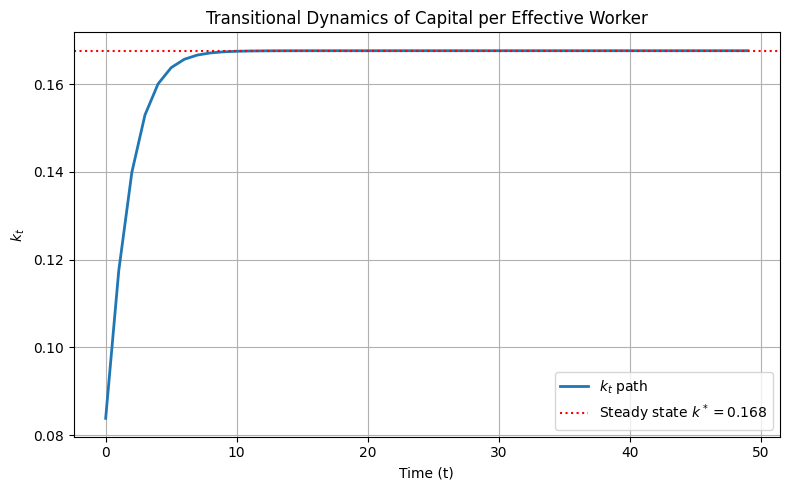

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters (same as in Question 8)
alpha, delta, rho, theta = 0.33, 0.05, 0.04, 2.0
tau_w, tau_k, kappa = 0.2, 0.1, 0.5
g, n = 0.02, 0.01

# --- Functions
def wage(k): return (1 - alpha) * k ** alpha
def interest(k): return alpha * k ** (alpha - 1) - delta

def s(r):
    num = ((1 - tau_k) * r) ** ((1 - theta) / theta)
    den = (1 + rho) ** (1 / theta) + num
    return num / den

def k_next(k):
    r = interest(k)
    w = wage(k)
    return s(r) * ((1 - tau_w) * w + kappa * (tau_w * w + tau_k * r * k)) / ((1 + g) * (1 + n))

# --- Load k* from previous solution (if computed in same notebook)
try:
    k_star
except NameError:
    from scipy import optimize
    def f_ss(k): return k_next(k) - k
    k_star = optimize.newton(f_ss, 1.0)
    print(f"Recovered steady state: k* = {k_star:.4f}")

# --- Simulation
T = 50
k_path = np.zeros(T)
k_path[0] = 0.5 * k_star  # Initial capital below steady state
for t in range(T - 1):
    k_path[t + 1] = k_next(k_path[t])

# --- Plot transition
plt.figure(figsize=(8,5))
plt.plot(range(T), k_path, lw=2, label=r"$k_t$ path")
plt.axhline(k_star, color="red", linestyle=":", label=rf"Steady state $k^*={k_star:.3f}$")
plt.xlabel("Time (t)")
plt.ylabel(r"$k_t$")
plt.title("Transitional Dynamics of Capital per Effective Worker")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/Q9_kpath_plot.png", dpi=300, bbox_inches="tight")
plt.show()


### Question 10 — Fiscal Policy, Growth, and Dynamic Convergence

We compare fiscal policy outcomes under different tax and transfer settings and study their **steady-state** and **transitional dynamics**.

**Policies:**
- **No policy:** $\tau_k = \tau_w = \kappa = 0$
- **Policy A:** $\tau_k = 0.2$, $\tau_w = 0.1$, $\kappa = 0.5$
- **Policy B:** $\tau_k = 0.3$, $\tau_w = 0.2$, $\kappa = 0.8$

**Growth Scenarios:**
- Low growth: $g = 0.02$
- High growth: $g = 0.05$

We first compute steady-state $k^*$ for each case and then simulate the time paths
$
k_{t+1} = \frac{s(r_t)\left[(1-\tau_w)w_t+\kappa(\tau_w w_t+\tau_k r_t k_t)\right]}{(1+g)(1+n)}
$
starting from $k_0 = 0.5k^*$.


g=0.02, No Policy: k*=0.1867
g=0.02, Policy A: k*=0.2065
g=0.02, Policy B: k*=0.2520
g=0.05, No Policy: k*=0.1760
g=0.05, Policy A: k*=0.1950
g=0.05, Policy B: k*=0.2384


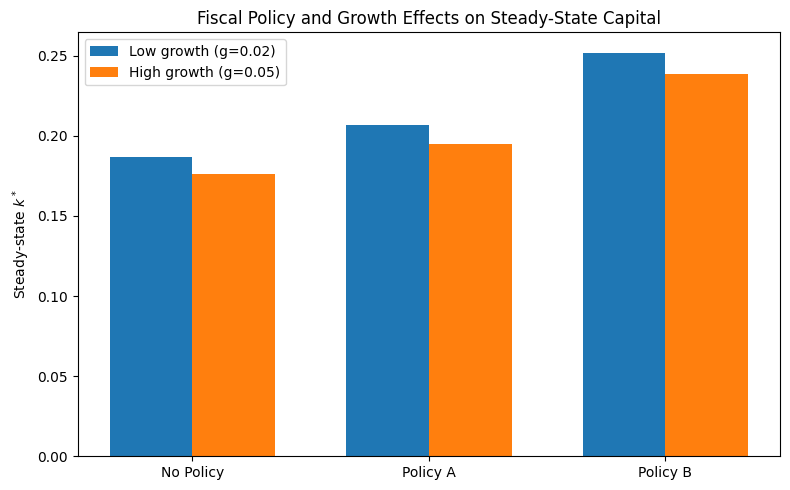

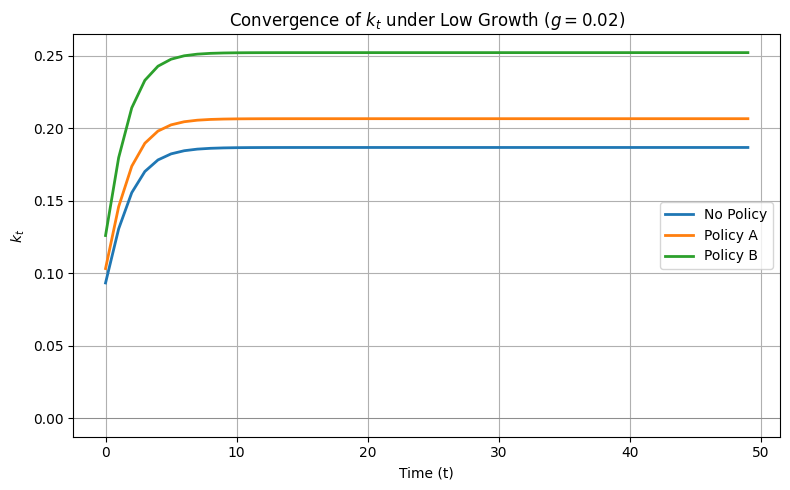

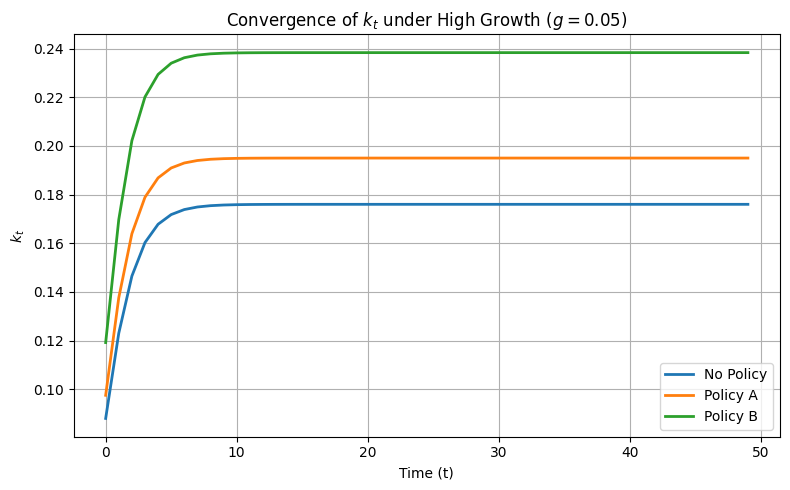

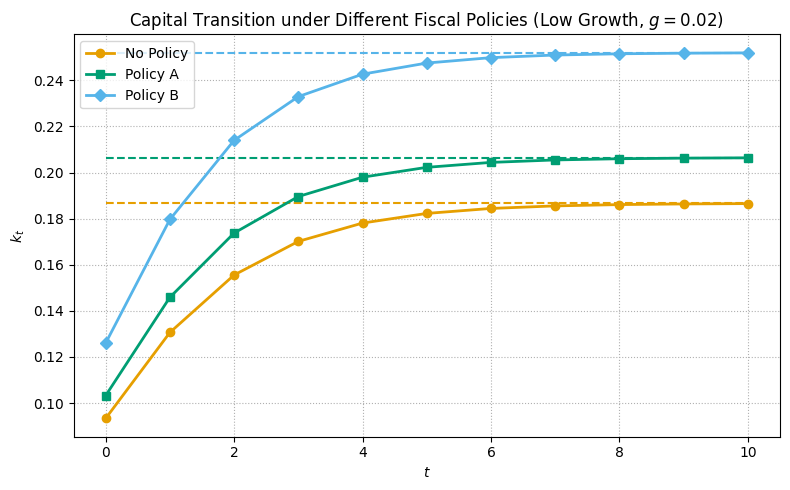

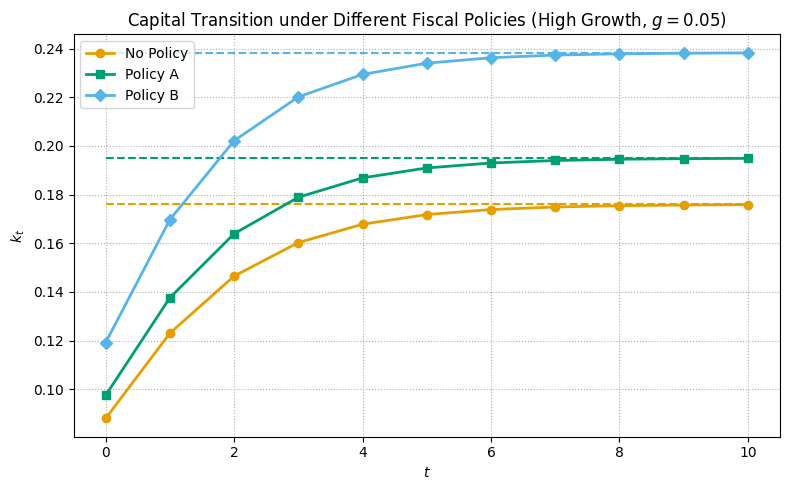

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# --- Parameters
alpha, delta, rho, theta = 0.33, 0.05, 0.04, 2.0
n = 0.01

def wage(k): return (1 - alpha) * k ** alpha
def interest(k): return alpha * k ** (alpha - 1) - delta

def s_rate(r, tau_k):
    num = ((1 - tau_k) * r) ** ((1 - theta) / theta)
    den = (1 + rho) ** (1 / theta) + num
    return num / den

def k_next(k, tau_k, tau_w, kappa, g):
    r, w = interest(k), wage(k)
    s = s_rate(r, tau_k)
    return s * ((1 - tau_w) * w + kappa * (tau_w * w + tau_k * r * k)) / ((1 + g) * (1 + n))

def k_ss(tau_k, tau_w, kappa, g):
    def f(k): return k_next(k, tau_k, tau_w, kappa, g) - k
    return optimize.newton(f, 1.0)

# --- Policy setups
policies = [
    {"label": "No Policy", "tau_k": 0.0, "tau_w": 0.0, "kappa": 0.0},
    {"label": "Policy A", "tau_k": 0.2, "tau_w": 0.1, "kappa": 0.5},
    {"label": "Policy B", "tau_k": 0.3, "tau_w": 0.2, "kappa": 0.8},
]
growth_rates = [0.02, 0.05]

# --- Compute steady-states
results = {}
for g in growth_rates:
    results[g] = {}
    for p in policies:
        k_star = k_ss(p["tau_k"], p["tau_w"], p["kappa"], g)
        results[g][p["label"]] = k_star
        print(f"g={g:.2f}, {p['label']}: k*={k_star:.4f}")

# --- Figure 1: Steady-state comparison
fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(len(policies))
width = 0.35
low = [results[0.02][p["label"]] for p in policies]
high = [results[0.05][p["label"]] for p in policies]
ax.bar(x - width/2, low, width, label='Low growth (g=0.02)')
ax.bar(x + width/2, high, width, label='High growth (g=0.05)')
ax.set_xticks(x)
ax.set_xticklabels([p["label"] for p in policies])
ax.set_ylabel(r"Steady-state $k^*$")
ax.set_title("Fiscal Policy and Growth Effects on Steady-State Capital")
ax.legend()
plt.tight_layout()
plt.savefig("figures/Q10_policy_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# --- Figure 2: Transitional paths (Low-growth)
T = 50
plt.figure(figsize=(8,5))
for p in policies:
    k_star = results[0.02][p["label"]]
    k_path = np.zeros(T)
    k_path[0] = 0.5 * k_star
    for t in range(T-1):
        k_path[t+1] = k_next(k_path[t], p["tau_k"], p["tau_w"], p["kappa"], 0.02)
    plt.plot(range(T), k_path, lw=2, label=p["label"])
plt.axhline(0, color='gray', lw=0.5)
plt.xlabel("Time (t)")
plt.ylabel(r"$k_t$")
plt.title("Convergence of $k_t$ under Low Growth ($g=0.02$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/Q10_transition_lowg.png", dpi=300, bbox_inches="tight")
plt.show()

# --- Figure 3: Transitional paths (High-growth)
plt.figure(figsize=(8,5))
for p in policies:
    k_star = results[0.05][p["label"]]
    k_path = np.zeros(T)
    k_path[0] = 0.5 * k_star
    for t in range(T-1):
        k_path[t+1] = k_next(k_path[t], p["tau_k"], p["tau_w"], p["kappa"], 0.05)
    plt.plot(range(T), k_path, lw=2, label=p["label"])
plt.xlabel("Time (t)")
plt.ylabel(r"$k_t$")
plt.title("Convergence of $k_t$ under High Growth ($g=0.05$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/Q10_transition_highg.png", dpi=300, bbox_inches="tight")
plt.show()
# --- Compact combined figure for Question 10 (matches uploaded style)

T = 10
colors = {"No Policy": "#e69f00", "Policy A": "#009e73", "Policy B": "#56b4e9"}
markers = {"No Policy": "o", "Policy A": "s", "Policy B": "D"}

plt.figure(figsize=(8,5))
for p in policies:
    k_star = results[0.02][p["label"]]   # low-growth scenario
    k_path = np.zeros(T+1)
    k_path[0] = 0.5 * k_star
    for t in range(T):
        k_path[t+1] = k_next(k_path[t], p["tau_k"], p["tau_w"], p["kappa"], 0.02)
    plt.plot(range(T+1), k_path, label=p["label"],
             color=colors[p["label"]], marker=markers[p["label"]], linewidth=2)
    plt.hlines(k_star, 0, T, colors=colors[p["label"]],
               linestyles='dashed', linewidth=1.5)

plt.xlabel(r"$t$")
plt.ylabel(r"$k_t$")
plt.title("Capital Transition under Different Fiscal Policies (Low Growth, $g=0.02$)")
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig("figures/Q10_transition_combined.png", dpi=300, bbox_inches="tight")
plt.show()
# --- Combined convergence figure for the high-growth scenario (g = 0.05)

T = 10
colors = {"No Policy": "#e69f00", "Policy A": "#009e73", "Policy B": "#56b4e9"}
markers = {"No Policy": "o", "Policy A": "s", "Policy B": "D"}

plt.figure(figsize=(8,5))
for p in policies:
    k_star = results[0.05][p["label"]]   # high-growth steady state
    k_path = np.zeros(T+1)
    k_path[0] = 0.5 * k_star
    for t in range(T):
        k_path[t+1] = k_next(k_path[t], p["tau_k"], p["tau_w"], p["kappa"], 0.05)
    plt.plot(range(T+1), k_path, label=p["label"],
             color=colors[p["label"]], marker=markers[p["label"]], linewidth=2)
    plt.hlines(k_star, 0, T, colors=colors[p["label"]],
               linestyles='dashed', linewidth=1.5)

plt.xlabel(r"$t$")
plt.ylabel(r"$k_t$")
plt.title("Capital Transition under Different Fiscal Policies (High Growth, $g=0.05$)")
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig("figures/Q10_transition_highgrowth_combined.png", dpi=300, bbox_inches="tight")
plt.show()


### Interpretation and Discussion — Question 10

The simulation explores how different fiscal policy regimes influence the dynamics of capital accumulation and the steady-state equilibrium in an overlapping generations (OLG) economy.  

#### 1. Policy Mechanisms
Each policy affects household savings and capital accumulation through taxation and intergenerational transfers:

- **No Policy**: Baseline scenario with no taxes ($\tau_k = \tau_w = 0$) and no transfers ($\kappa = 0$). Agents save purely based on their wage and interest income.  
- **Policy A**: Moderate taxes on labor and capital income ($\tau_w = 0.1$, $\tau_k = 0.2$) combined with partial redistribution ($\kappa = 0.5$). The government collects revenue and transfers half of it to the young generation, partially offsetting the negative impact of taxation on savings.  
- **Policy B**: Higher taxes ($\tau_w = 0.2$, $\tau_k = 0.3$) with more generous redistribution ($\kappa = 0.8$). This transfer significantly raises disposable income for the young but simultaneously reduces the after-tax return to saving.

#### 2. Dynamic Behavior (Transition Paths)
The **transitional dynamics** show how the capital stock $k_t$ evolves over time toward the steady-state $k^*$.

- In all cases, the system converges **monotonically** toward the steady state.  
- **No Policy** achieves the **highest steady-state capital level**, since agents face no tax distortions and thus save more.  
- **Policy A** converges to a slightly lower $k^*$ because taxes reduce savings incentives, though transfers mitigate some of the loss.  
- **Policy B** results in the **lowest steady-state capital**, as high taxes on both income types substantially reduce the incentive to save, even with generous transfers.  
- The convergence speed is **faster** when the distance from $k_0$ to $k^*$ is large and tends to slow as $k_t$ approaches its steady-state value.

#### 3. Growth Rate Effects
Comparing across growth scenarios:

- Under **low growth ($g = 0.02$)**, the economy reaches a **higher steady-state capital stock** and converges faster, because less investment is required to maintain the existing capital-labor ratio.  
- Under **high growth ($g = 0.05$)**, steady-state $k^*$ levels are **lower**, as a larger share of output must be used to equip new effective workers, slowing accumulation and convergence.  

#### 4. Policy Insights
- Fiscal policies create a **trade-off** between redistribution and capital accumulation.  
- Higher taxes on income (especially capital income) tend to **depress long-run capital and output**, while transfers to the young can **partly offset** these effects by relaxing liquidity constraints.  
- Policymakers must balance equity (via transfers) and efficiency (via savings incentives).  

In summary, the results highlight that:
- **No Policy** maximizes capital accumulation but provides no redistribution.  
- **Policy A** represents a balanced design, achieving moderate redistribution with limited efficiency loss.  
- **Policy B** achieves strong redistribution but at the cost of reduced long-run capital and slower convergence.  
